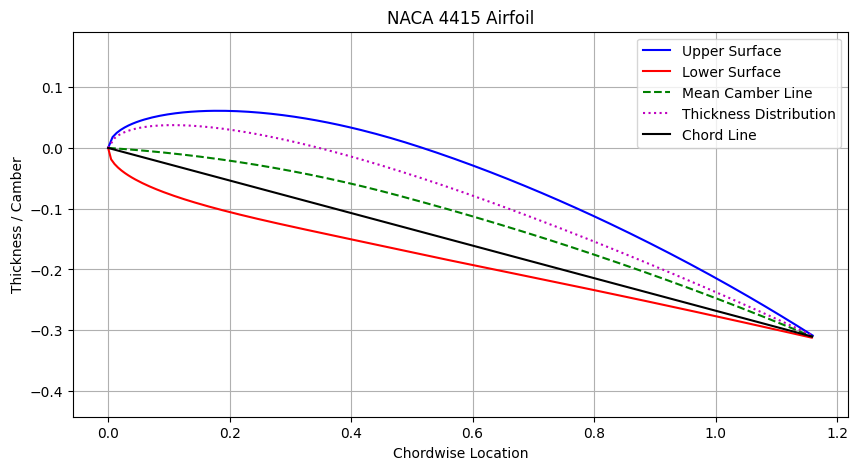

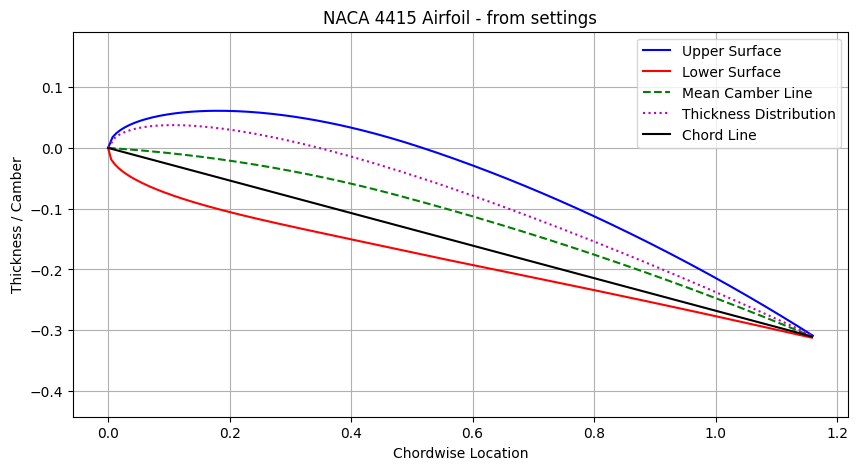

In [1]:
from airfoil.airfoil import NACA4
from settings.initial_settings import InitialSettingsReader

settings = InitialSettingsReader('../input/initial_settings.json')

naca_4415 = NACA4("4415", chord_length=1.2, resolution=200)
naca_4415.set_angle_of_attack(15)
naca_4415.plot(title="NACA 4415 Airfoil")

naca_4415_2 = NACA4(setup=settings)
naca_4415_2.set_angle_of_attack(15)
naca_4415_2.plot(title="NACA 4415 Airfoil - from settings")

Downloaded b737d to C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\input\airfoils\b737d.dat


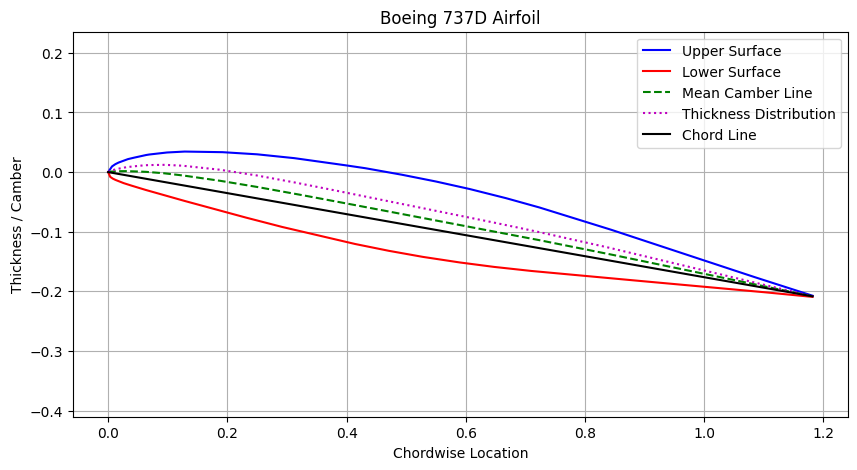

Downloaded b737d to C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\input\airfoils\b737d.dat


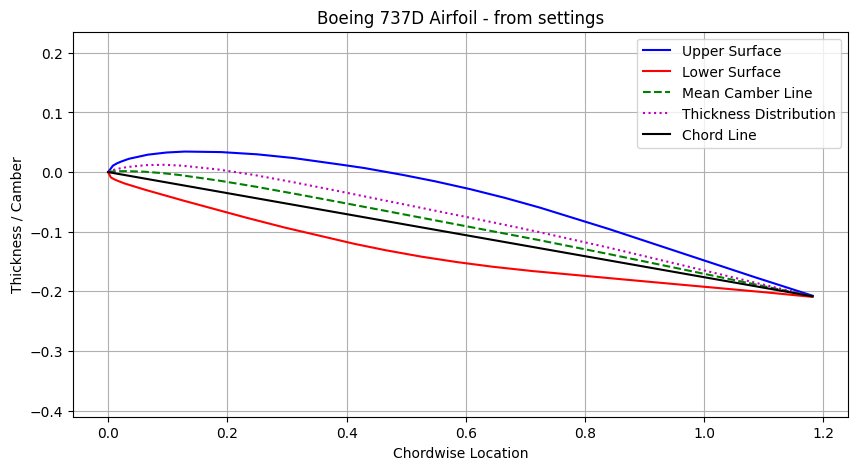

In [2]:
from airfoil.airfoil import UIUCAirfoil
from settings.initial_settings import InitialSettingsReader

settings = InitialSettingsReader('../input/initial_settings.json')

b737d = UIUCAirfoil("b737d", chord_length=1.2, resolution=250)
b737d.set_angle_of_attack(10)
b737d.plot(title="Boeing 737D Airfoil")

b737d_2 = UIUCAirfoil(setup=settings)
b737d_2.set_angle_of_attack(10)
b737d_2.plot(title="Boeing 737D Airfoil - from settings")

In [1]:
from simulation.openfoam.mesh import snappy_hex_mesh_dict
from simulation.openfoam.mesh import block_mesh_dict
from settings.initial_settings import InitialSettingsReader
from airfoil.airfoil import NACA4
from pathlib import Path

settings = InitialSettingsReader("../input/initial_settings.json")
airfoil = NACA4("4412", chord_length=1.2, resolution=300)
airfoil.to_stl(Path("./naca4412.stl"))

# block_mesh_dict(
#     airfoil=airfoil,
#     setup=settings,
#     output_path=Path("./blockMeshDict"),
# )

# snappy_hex_mesh_dict(
#     airfoil=airfoil,
#     setup=settings,
#     output_path=Path("./snappyHexMeshDict")
# )

[2025-12-06 16:42:23] WARNING:                   Key 'Airfoil.GenerateNACA' is not allowed in this position.
[2025-12-06 16:42:23] WARNING:                   Key 'Mesh.SnappyHexMesh.CastellatedMeshControls.AirfoilPatchType' is not allowed in this position.
[2025-12-06 16:42:23] WARNING:                   Key 'Mesh.cfMesh' is not allowed in this position.
[2025-12-06 16:42:23] WARNING:                   Key 'Simulation.FvSchemes.SnGradSchemes' is not allowed in this position.
[2025-12-06 16:42:23] WARNING:                   Key 'Simulation.FvSchemes.DistanceSchemes' is not allowed in this position.
[2025-12-06 16:42:23] WARNING:                   Key 'Simulation.SurfaceFeatureExtract' is not allowed in this position.
[2025-12-06 16:42:23] Airfoil: 4412, Chord length: 1.2, Angle of attack: 0.0


[2025-12-05 15:50:03] WARNING:                   Key 'Airfoil.GenerateNACA' is not allowed in this position.
[2025-12-05 15:50:03] WARNING:                   Key 'Simulation.SurfaceFeatureExtract' is not allowed in this position.
[2025-12-05 15:50:03] Airfoil: 23009, Chord length: 1.5, Angle of attack: 0.0


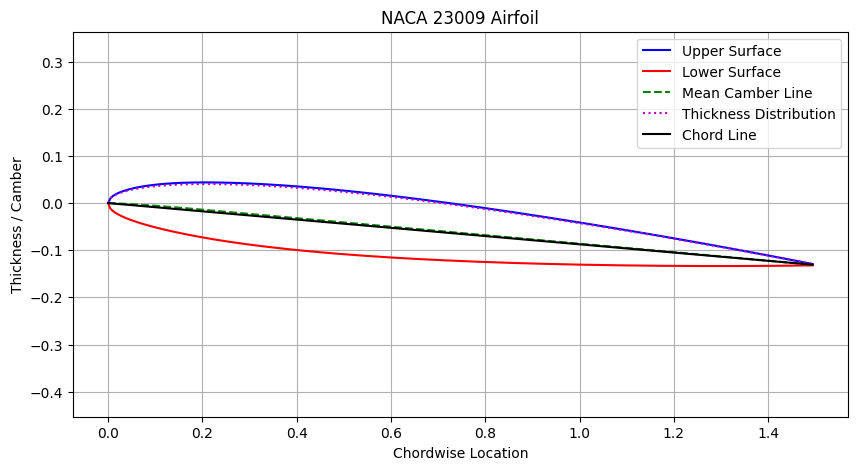

In [1]:
from simulation.preparation.prepare_case import prepare_openfoam_case
from settings.initial_settings import InitialSettingsReader
from airfoil.airfoil import NACA5
from pathlib import Path

settings = InitialSettingsReader("../input/initial_settings.json")
airfoil = NACA5("23009", chord_length=1.5, resolution=300)
airfoil.set_angle_of_attack(5)
airfoil.plot(title="NACA 23009 Airfoil")
airfoil.to_stl(Path("./airfoil.stl"), dimension=3)


In [ ]:
cd /app/src/simulation/run/ && bash ./run_case.sh --working-dir /app/test_input --setup-file /app/test_input/initial_settings.json --case-name airfoil

cd /app/test_input/airfoil && cp /app/src/simulation/run/run_postprocess.sh . && bash ./run_postprocess.sh /app/test_input/airfoil
# rethink boundary conditions for different definitions
# reorganize boundary conditions for turbulence models
# mesh checks - y+ and gci
# add z-direction thinness to settings
# add fallback for snappyHexMeshDicts when not specified in settings

In [2]:
from postprocess.visualizations import plot_residuals
from pathlib import Path

# Use raw string or forward slashes for Windows paths
logs_dir = Path(r'C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\test_input\airfoil\logs')

# Or alternatively with forward slashes (works on Windows too)
# logs_dir = Path('C:/Users/Arkadiusz Drabik/Desktop/Nowy folder/code/repos/OpenFOAM_airfoil/test_input/airfoil copy/logs')

plot_residuals(logs_dir, output_dir=Path('plots'))

[2025-12-18 15:19:08] Plot saved to: plots\residuals.png
[2025-12-18 15:19:09] Plot saved to: plots\residuals.pdf


In [1]:
from postprocess.visualizations import (
    plot_velocity_contours, 
    plot_pressure_contours, 
    plot_streamlines, 
    plot_velocity_profiles
)
from pathlib import Path

# Setup paths
vtk_dir = Path(r"C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\test_input\airfoil\VTK")
output_dir = Path("plots")
output_dir.mkdir(exist_ok=True)

# Generate all plots
plot_streamlines(
    vtk_dir, 
    n_streamlines=100, 
    output_dir=output_dir,
    save_formats=['png', 'html']  # Creates interactive HTML + static PNG
)

plot_velocity_contours(
    vtk_dir, 
    output_dir=output_dir,
    save_formats=['png', 'html']
)

plot_pressure_contours(
    vtk_dir, 
    output_dir=output_dir,
    save_formats=['png', 'html']
)

plot_velocity_profiles(
    vtk_dir, 
    x_locations=[0.1, 0.25, 0.5, 0.75, 1.0],
    output_dir=output_dir,
    save_formats=['png', 'pdf']  # PDF is vector graphics - infinite zoom
)

[2025-12-18 15:17:11] Loading VTM file: airfoil_1000.vtm
[2025-12-18 15:17:12] Multi-block dataset loaded with 2 blocks
[2025-12-18 15:17:12] Internal mesh: 168608 cells, 342218 points
[2025-12-18 15:17:12] Available fields: ['TimeValue', 'k', 'nut', 'omega', 'p', 'yPlus', 'U', 'wallShearStress', 'k', 'nut', 'omega', 'p', 'yPlus', 'U', 'wallShearStress']
[2025-12-18 15:17:13] Loaded boundary 'airfoil': 3008 points, 1504 cells
[2025-12-18 15:17:13] Generated 22846 streamline points
[2025-12-18 15:17:13] Plot saved to: plots\streamlines.png
[2025-12-18 15:17:14] Plot saved to: plots\streamlines.html
[2025-12-18 15:17:14] Loading VTM file: airfoil_1000.vtm
[2025-12-18 15:17:15] Multi-block dataset loaded with 2 blocks
[2025-12-18 15:17:15] Internal mesh: 168608 cells, 342218 points
[2025-12-18 15:17:15] Available fields: ['TimeValue', 'k', 'nut', 'omega', 'p', 'yPlus', 'U', 'wallShearStress', 'k', 'nut', 'omega', 'p', 'yPlus', 'U', 'wallShearStress']
[2025-12-18 15:17:15] Loaded boundary 

[2025-12-20 09:15:23] Reading force coefficients from: C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\test_input\airfoil\postProcessing\forceCoeffs\0\coefficient.dat
[2025-12-20 09:15:24] Plot saved to: plots\force_coefficients.png
[2025-12-20 09:15:24] Plot saved to: plots\force_coefficients.pdf


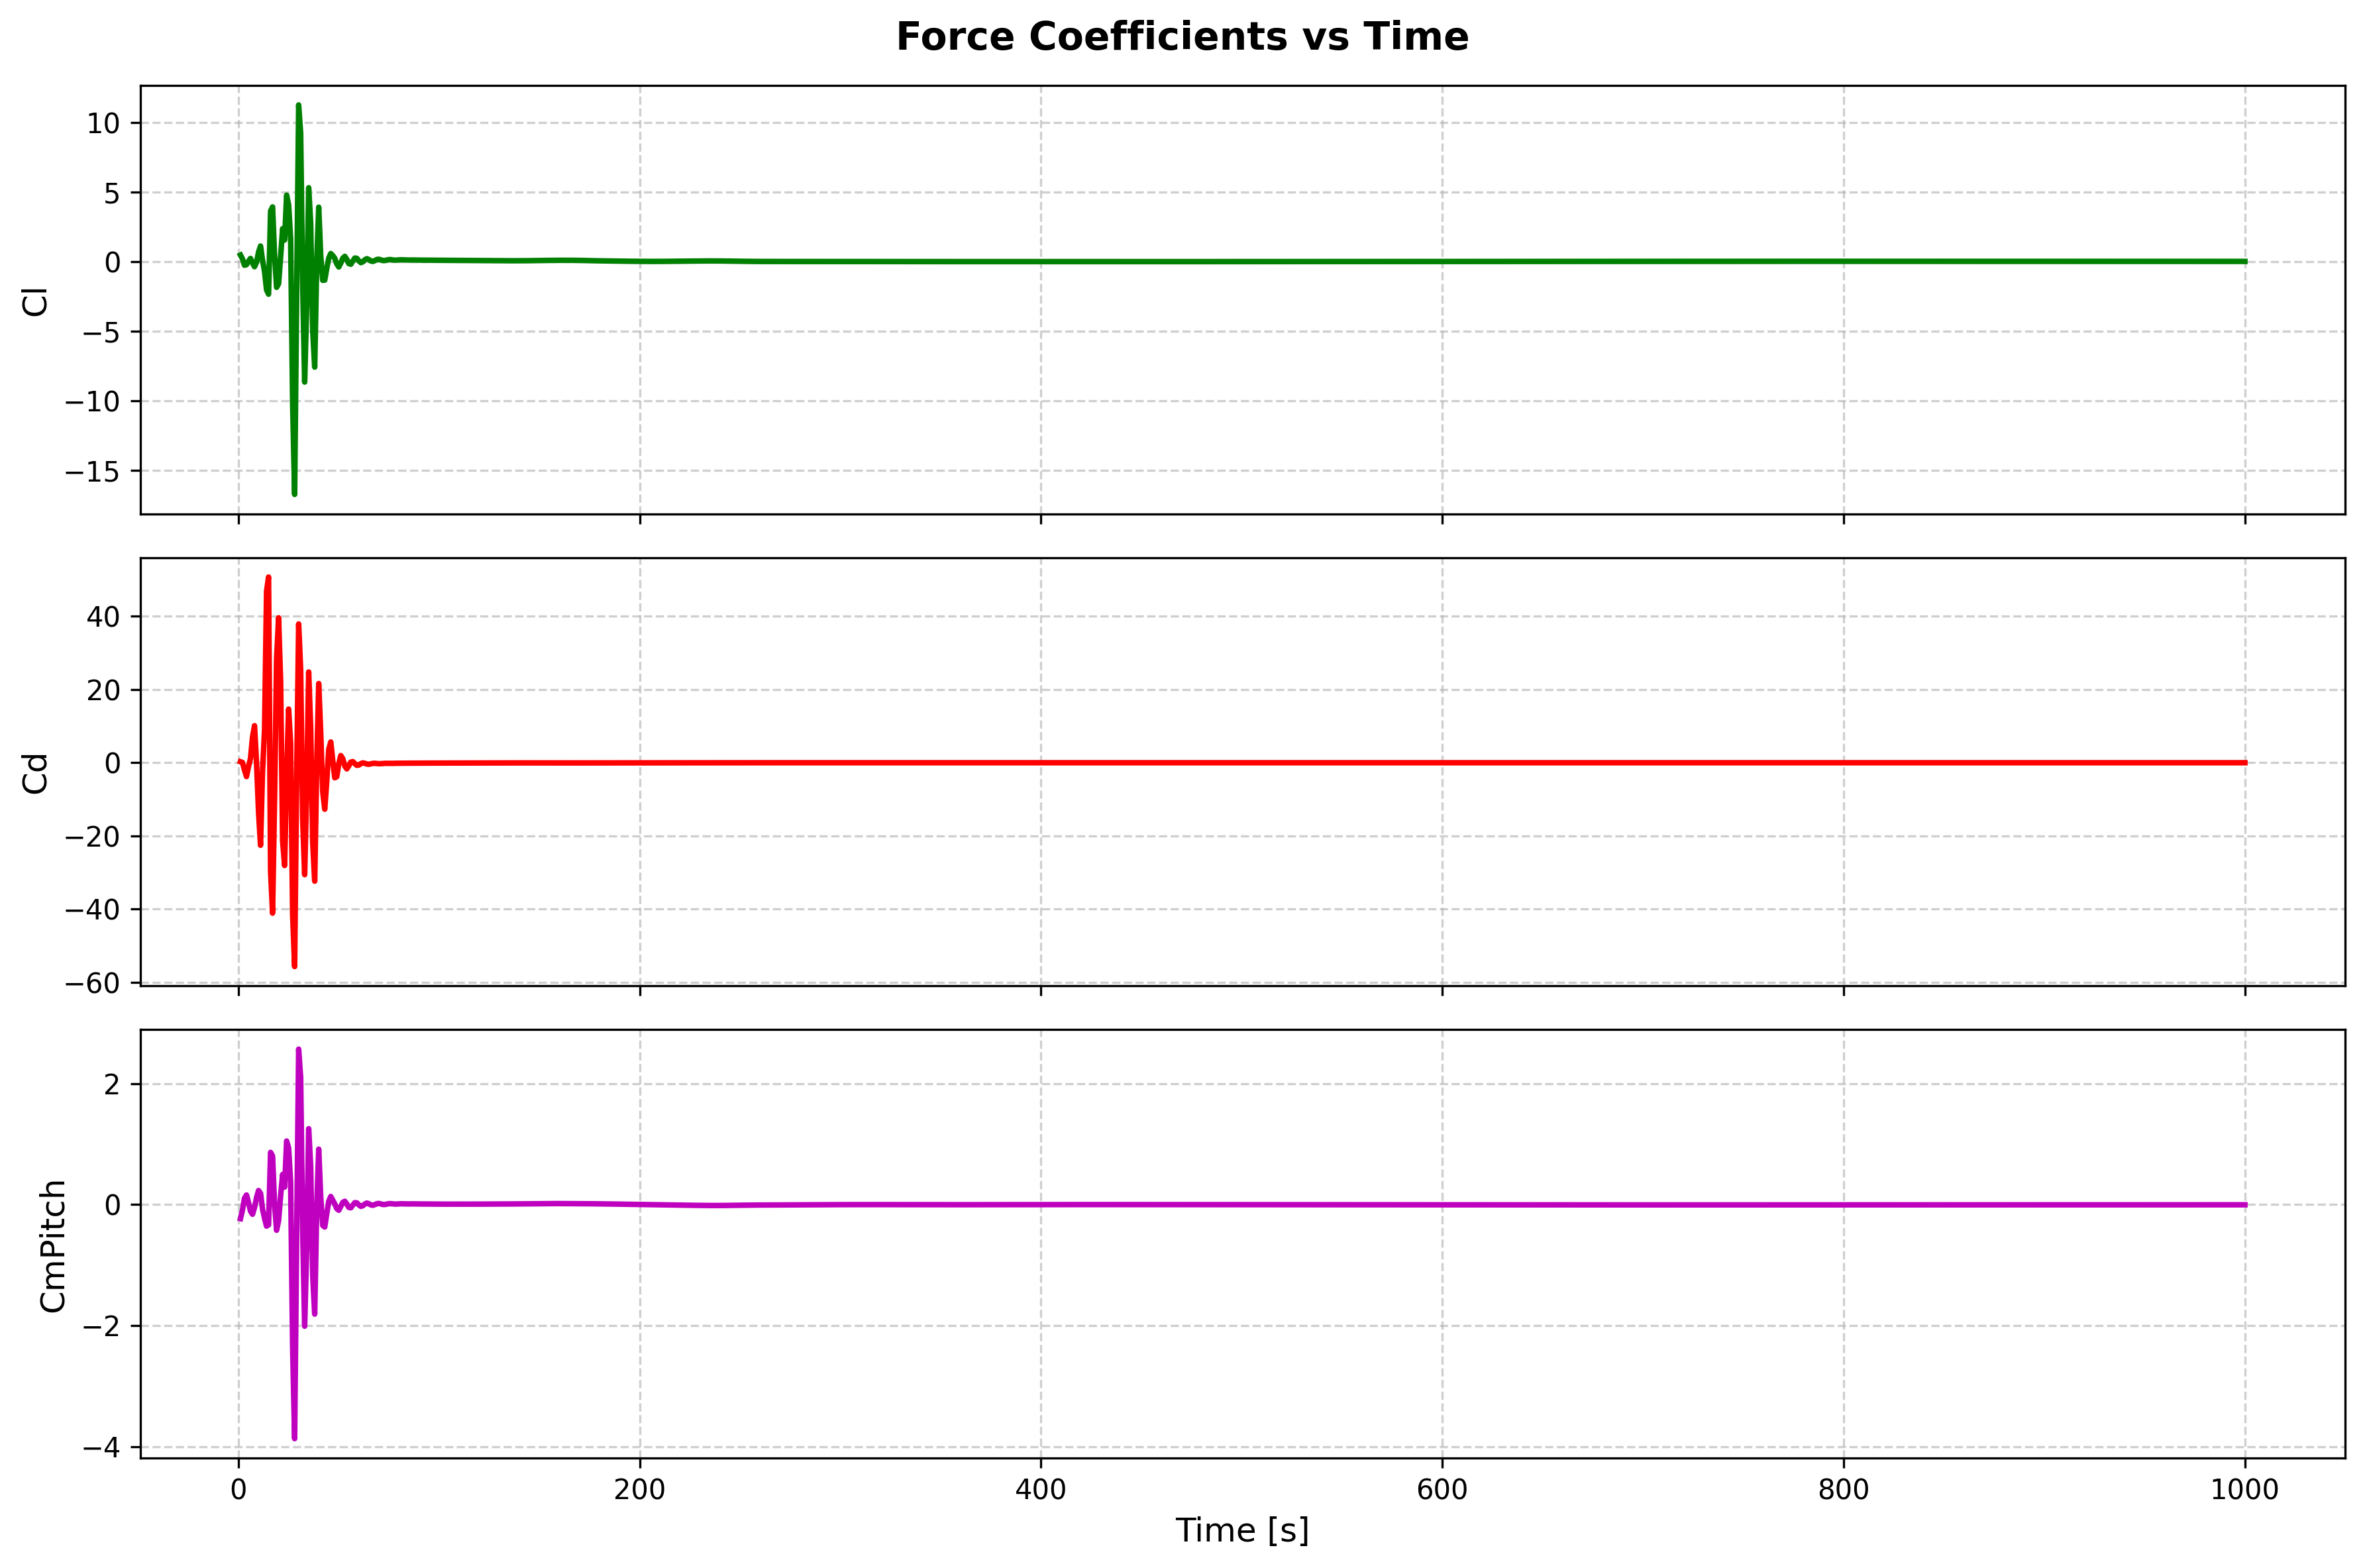

In [1]:
from postprocess.visualizations import plot_force_coefficients

from pathlib import Path

# Setup paths
case_dir = Path(r"C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\test_input\airfoil")
output_dir = Path("plots")
output_dir.mkdir(exist_ok=True)

plot_force_coefficients(case_dir=case_dir, output_dir=output_dir, show=True)